In [28]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# init FTDI device
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6)
# reload configuration (optional step - just to fill BRAM (DACGAIN registers) with initial values)
fpga.reload()
# reset fpga
fpga.reset()

In [22]:
fpga.csr.ponw = 16
fpga.csr.interw = 16
fpga.csr.poffw = 4096
fpga.csr.led1= 1
gain = [int(100 + ((1000-100)*x*x*x/32/32/32)) for x in range(32)]


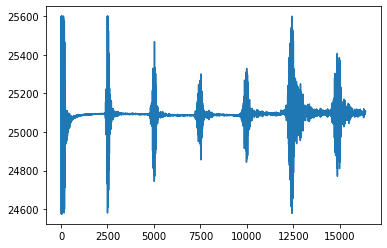

In [26]:
acq_res = fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 
plt.plot(acq_res[0])

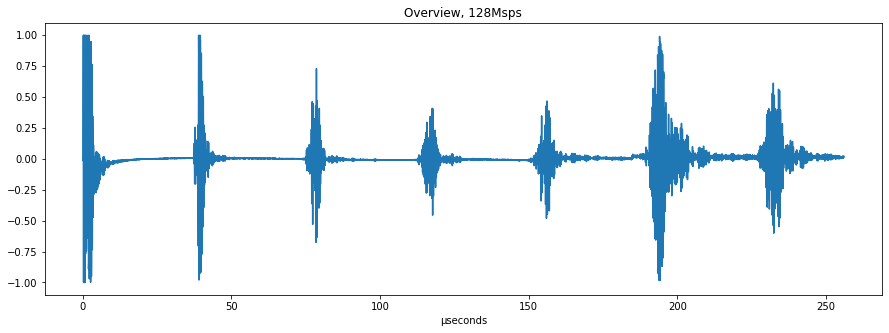

In [59]:
def line_to_voltage(line):
    SAMPLE_W = 10
    SAMPLE_N = 2 ** SAMPLE_W
    res = [((2 * 1.0) / SAMPLE_N) * ((w & (SAMPLE_N - 1)) - SAMPLE_N // 2) for w in line]
    return np.array(res)

line0 = line_to_voltage(acq_res[0])
line1 = line_to_voltage(acq_res[1])
 
for k in range(32//2 - 1):
    line0 = line0 + line_to_voltage(acq_res[2*(k+1)  ])
    line1 = line1 + line_to_voltage(acq_res[2*(k+1)+1])

signal = []
for k in range(len(line0)):
    signal.append(line0[k])
    signal.append(line1[k])
    
signal = np.array(signal)/16.0
t = [x*256.0/len(signal) for x in range(len(signal))]

plt.figure(figsize=(15,5))
plt.title("Overview, 128Msps")
plt.xlabel("µseconds")
plt.plot(t,signal)
